# PROJECT TITLE: Exam mark prediction using Linear Regression - Multiple Values

## About the Project
The project utilizes multiple linear regression to predict students' exam marks based on academic factors such as age, study hours, and internet access. It focuses on real-world data collected from Saint Joseph's college students in Ondo, Nigeria, to understand how academic activities influence performance and guide educators in identifying at-risk students.
## Goal
* To develop a predictive model using linear regression to estimate students' exam marks based on multiple factors such as age, study hours, and internet access.
* To provide an accurate and efficient tool for educational institutions to identify students who may need additional academic support.
## Dataset Details
* The dataset with 201 entries was custom-collected from students of St.Joseph's college, Ondo, Nigeria
* The dataset includes multiple features (age, study hours, access to internet(1=Yes, 0=No) alongside the target variabl(exam marks)
## Methodologies
* The dataset was compiled by gathering academic performance data fromSt.Joseph's college students.
* Missing data was handled by imputing average values.
* Scalling numerical features to standardize the dataset.
* Selected the most relevant predictors of exam marks based on correlation analysis.
## Model Development
* A multiple linear regression model was implemented to predict exam marks based on the selected features.
## Visualization
* Scatter plots and regression lines were used to illustrate the relationship between predictors and the target variable.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [51]:
data = r"C:\Users\UDOH\Desktop\ALL PANTECH\12_ExamMarkPrediction_LINEARREGRESSION_MULTIPLEVARIABLES\12_ExamMarkPrediction_LINEARREGRESSION_MULTIPLEVARIABLES\data.csv"

In [52]:
df = pd.read_csv(data)

In [53]:
df.head()

,hours,age,internet,marks
0,6.83,15,1,78.50
1,6.56,16,0,76.74
2,NaN,17,1,78.68
3,5.67,18,0,71.82
4,8.67,19,1,84.19


In [12]:
df.shape

(201, 4)

In [13]:
# Find NA values from our Features X
df.isna().any()

hours        True
age         False
internet    False
marks       False
dtype: bool

In [14]:
# Fill NAN in hours with the mean
df['hours'] = df['hours'].fillna(round(df['hours'].mean(), 2))

### Segregate Dataset into input X and Output Y

In [25]:
x = df.iloc[:, :-1].values
x

array([[ 6.83, 15.  ,  1.  ],
       [ 6.56, 16.  ,  0.  ],
       [ 6.98, 17.  ,  1.  ],
       [ 5.67, 18.  ,  0.  ],
       [ 8.67, 19.  ,  1.  ],
       [ 7.55, 20.  ,  0.  ],
       [ 6.67, 15.  ,  0.  ],
       [ 8.99, 16.  ,  0.  ],
       [ 5.19, 17.  ,  1.  ],
       [ 6.75, 18.  ,  0.  ],
       [ 6.59, 19.  ,  0.  ],
       [ 8.56, 20.  ,  1.  ],
       [ 7.75, 15.  ,  0.  ],
       [ 7.9 , 16.  ,  1.  ],
       [ 8.19, 17.  ,  0.  ],
       [ 6.55, 18.  ,  1.  ],
       [ 6.36, 19.  ,  0.  ],
       [ 8.44, 20.  ,  1.  ],
       [ 8.41, 15.  ,  0.  ],
       [ 7.67, 16.  ,  1.  ],
       [ 7.42, 17.  ,  1.  ],
       [ 8.16, 18.  ,  1.  ],
       [ 5.05, 19.  ,  1.  ],
       [ 5.85, 20.  ,  1.  ],
       [ 5.45, 15.  ,  0.  ],
       [ 7.96, 16.  ,  0.  ],
       [ 6.51, 17.  ,  0.  ],
       [ 6.73, 18.  ,  0.  ],
       [ 5.94, 19.  ,  1.  ],
       [ 7.48, 20.  ,  0.  ],
       [ 8.13, 15.  ,  1.  ],
       [ 6.98, 16.  ,  1.  ],
       [ 5.4 , 17.  ,  1.  ],
       [ 8

In [26]:
Y = df.iloc[:, -1].values
Y

array([78.5 , 76.74, 78.68, 71.82, 84.19, 81.18, 76.99, 85.46, 70.66,
       77.82, 75.37, 83.88, 79.5 , 80.76, 83.08, 76.03, 76.04, 85.11,
       82.5 , 80.58, 82.18, 83.36, 70.67, 75.02, 70.96, 83.33, 74.75,
       75.65, 74.15, 80.17, 82.27, 76.14, 71.1 , 84.35, 83.08, 76.76,
       81.24, 78.21, 73.08, 83.23, 70.27, 86.41, 71.1 , 82.84, 82.38,
       72.96, 77.46, 70.11, 72.38, 71.41, 72.22, 77.77, 84.44, 71.45,
       82.21, 85.48, 75.03, 86.65, 70.9 , 71.7 , 73.61, 79.41, 76.19,
       80.43, 85.78, 70.06, 81.25, 81.7 , 69.27, 82.79, 71.8 , 71.79,
       74.97, 78.61, 77.59, 72.33, 72.08, 77.33, 70.05, 73.34, 84.  ,
       82.93, 76.63, 75.36, 77.29, 72.87, 73.4 , 81.74, 71.85, 84.6 ,
       79.56, 82.1 , 72.08, 79.1 , 81.01, 76.48, 75.39, 68.57, 83.64,
       82.3 , 75.18, 82.03, 82.99, 79.26, 77.55, 77.07, 72.1 , 73.25,
       74.25, 70.58, 81.08, 75.04, 76.38, 80.86, 78.42, 74.44, 70.34,
       85.04, 73.61, 75.55, 76.2 , 82.69, 76.83, 79.53, 83.57, 85.95,
       76.02, 77.65,

### Training Dataset Using Linear Regression

In [27]:
model = LinearRegression()
model.fit(x,Y)

LinearRegression()

### Predicted Mark using custom values

In [39]:
a = [[15, 15, 0]]
PredictedmodelResult = model.predict(a)

print(PredictedmodelResult)

[108.20454923]


In [40]:
Hours = float(input("Enter hours spent on reading:"))
Age = int(input("Enter Age: "))
Internet = int(input("Access to internet? Enter 1 for Yes , 0 for No: "))

a = [[Hours,Age,Internet]]
PredictedmodelResult = round(model.predict(a)[0])

print(f"The Predicted Mark is:", (PredictedmodelResult))

Enter hours spent on reading:8
Enter Age: 78
Access to internet? Enter 1 for Yes , 0 for No: 0
The Predicted Mark is: 80


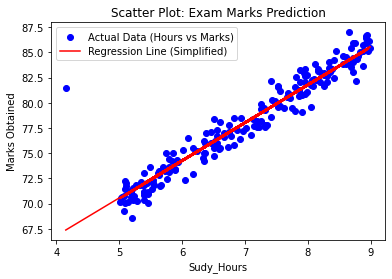

In [66]:
# Predict marks using the regression model
y_pred = model.predict(x)

# Scatter plot using 'hours' as x-axis (for visualization purposes)
plt.scatter(df['hours'], df['marks'], color='blue', label='Actual Data (Hours vs Marks)')

# Plot the regression line (using hours to simplify visualization)
plt.plot(df['hours'], y_pred, color='red', label='Regression Line (Simplified)')

# Add labels, title, and legend
plt.xlabel('Sudy_Hours')
plt.ylabel('Marks Obtained')
plt.title('Scatter Plot: Exam Marks Prediction')
plt.legend()

# Show the plot
plt.show()

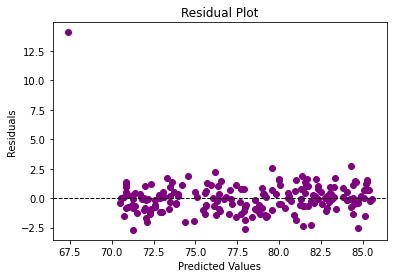

In [60]:
#The difference between actual values and predicted values (residuals). This helps to check if the model fits well.

# Calculate residuals
residuals = Y - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

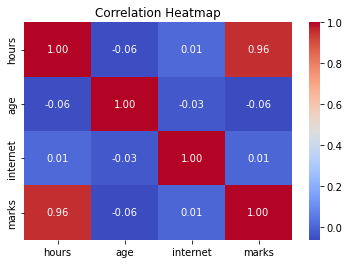

In [61]:
 # The correlation between all numeric variables in the dataset.
    
# Create a correlation matrix
correlation_matrix = df.corr()

# Visualize the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


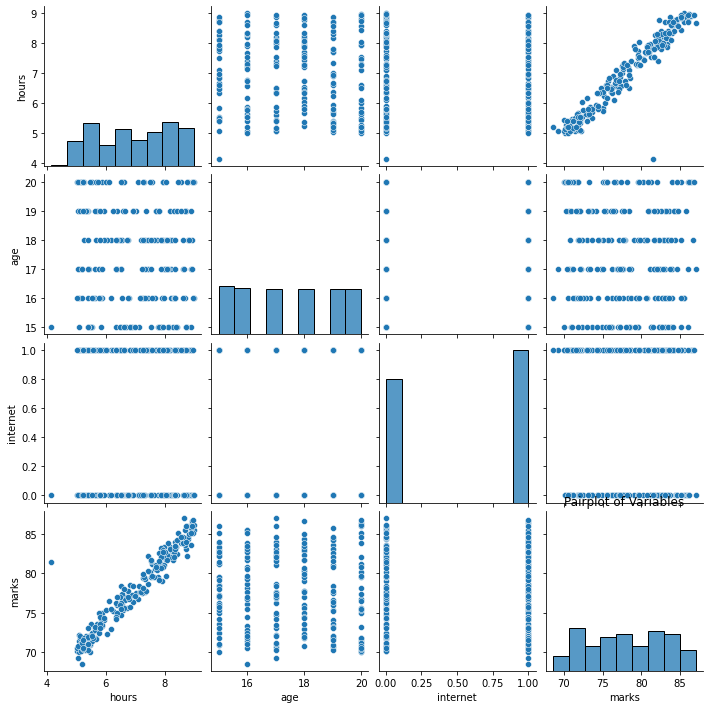

In [62]:
# To do the pairwise relationships between all variables in the dataset.

# Create a pairplot
sns.pairplot(df)
plt.title('Pairplot of Variables')
plt.show()


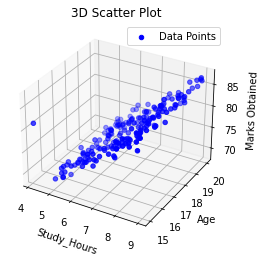

In [67]:
# To Visualize the relationship between three variables (e.g., hours, age, marks)

# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['hours'], df['age'], df['marks'], color='blue', label='Data Points')

# Add labels
ax.set_xlabel('Study_Hours')
ax.set_ylabel('Age')
ax.set_zlabel('Marks Obtained')
ax.set_title('3D Scatter Plot')
plt.legend()
plt.show()


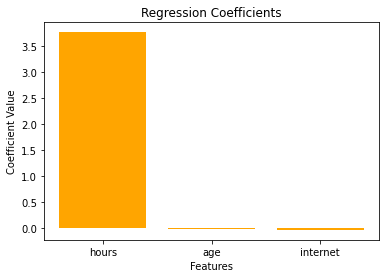

In [65]:
# T0 find How much each predictor contributes to the target variable

# Get coefficients from the Linear Regression model
coefficients = model.coef_
features = ['hours', 'age', 'internet']

# Visualize coefficients
plt.bar(features, coefficients, color='orange')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Regression Coefficients')
plt.show()
